# Genetic Algorithms

The y=target is to maximize this equation ASAP:

> **y = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + w6x6**


  where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7)

  What are the best values for the 6 weights w1 to w6?

  We are going to use the genetic algorithm for the best possible values after a number of generations.

  **decimal representation for genes, one point crossover, and uniform mutation**



In [25]:
import numpy as np

Define the initial population. Based on the number of weights, each chromosome (solution or individual) in the population will definitely have 6 genes, one gene for each weight

In [26]:
# Inputs of the equation.
equation_inputs = [4,-2,3.5,5,-11,-4.7]

# Number of the weights we are looking to optimize.
num_weights = len(equation_inputs)

In [28]:
sol_per_pop = 8
num_parents_mating = 4

# Defining the population size.
pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
#Creating the initial population.
new_population = np.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)

[[-2.60838951  3.9680872   0.81499088  0.06990784  0.72017331  2.81647569]
 [ 3.17424301 -1.96984974 -2.01239237  0.42961801  0.16543843  0.42058936]
 [-2.47913329 -2.87658121  2.76478728  2.43625586 -0.51595442 -2.90050436]
 [-2.72591994 -3.15252995 -3.48349337  2.94211972  3.50846069 -0.8512083 ]
 [-1.14786097  2.64344672  0.30150604 -2.94182554 -2.1913778  -1.92580012]
 [ 0.25004635  3.63024754 -3.96627756  0.15482154 -0.25154305 -1.53731123]
 [-2.56378604  1.68878848  2.28139494  3.11695968  3.11491469 -2.39886294]
 [ 0.88008038 -3.63893617  0.14318161 -1.89488944 -1.63279932  0.77852731]]


**Genetic algorithm:**

> Fitness Calculation

>  Mating Pool

> Parent Selection

> Crossover

> Mutation








In [27]:
def cal_pop_fitness(equation_inputs, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    # fitness value is the target variable (y)
    fitness = np.sum(pop*equation_inputs, axis=1)
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = np.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents

def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    crossover_point = np.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover, num_mutations=1):
    mutations_counter = np.uint8(offspring_crossover.shape[1] / num_mutations)
    # Mutation changes a number of genes as defined by the num_mutations argument. The changes are random.
    for idx in range(offspring_crossover.shape[0]):
        gene_idx = mutations_counter - 1
        for mutation_num in range(num_mutations):
            # The random value to be added to the gene.
            random_value = np.random.uniform(-1.0, 1.0, 1)
            offspring_crossover[idx, gene_idx] = offspring_crossover[idx, gene_idx] + random_value
            gene_idx = gene_idx + mutations_counter
    return offspring_crossover

In [29]:
best_outputs = []
num_generations = 10
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(equation_inputs, new_population)
    print("Fitness")
    print(fitness)
    best_outputs.append(np.max(np.sum(new_population*equation_inputs, axis=1)))
    # The best result in the current iteration.
    print("Best result : ", np.max(np.sum(new_population*equation_inputs, axis=1)))

    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, fitness, 
                                      num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    print("Crossover")
    print(offspring_crossover)

    # Adding some variations to the offspring using mutation.
    offspring_mutation = mutation(offspring_crossover, num_mutations=2)
    print("Mutation")
    print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

Generation :  0
Fitness
[-36.32706737   7.94479554  37.00253313 -36.6726366    9.62422238
  -9.37583712 -13.05244618  16.12659643]
Best result :  37.00253312742181
Parents
[[-2.47913329 -2.87658121  2.76478728  2.43625586 -0.51595442 -2.90050436]
 [ 0.88008038 -3.63893617  0.14318161 -1.89488944 -1.63279932  0.77852731]
 [-1.14786097  2.64344672  0.30150604 -2.94182554 -2.1913778  -1.92580012]
 [ 3.17424301 -1.96984974 -2.01239237  0.42961801  0.16543843  0.42058936]]
Crossover
[[-2.47913329 -2.87658121  2.76478728 -1.89488944 -1.63279932  0.77852731]
 [ 0.88008038 -3.63893617  0.14318161 -2.94182554 -2.1913778  -1.92580012]
 [-1.14786097  2.64344672  0.30150604  0.42961801  0.16543843  0.42058936]
 [ 3.17424301 -1.96984974 -2.01239237  2.43625586 -0.51595442 -2.90050436]]
Mutation
[[-2.47913329 -2.87658121  2.82757027 -1.89488944 -1.63279932  0.79469878]
 [ 0.88008038 -3.63893617  0.23647766 -2.94182554 -2.1913778  -2.12496663]
 [-1.14786097  2.64344672  0.94350957  0.42961801  0.1654

Best result after higher generation now has a fitness value compared to the best result after the first generation

In [30]:
# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])

Best solution :  [[[ 3.17424301 -1.96984974  0.40788335  2.43625586 -0.51595442
   -6.97754728]]]
Best solution fitness :  [68.71551338]


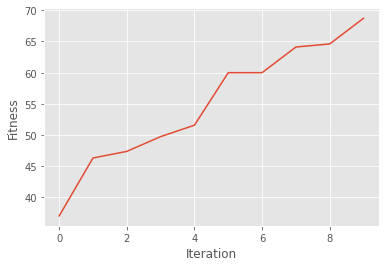

In [31]:
import matplotlib.pyplot
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()